<a href="https://colab.research.google.com/github/sohaib-khan0/cs351-ai-lab-2022551/blob/main/Lab_Task_05_Lab_Title_Exploring_Polynomial_Regression_and_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

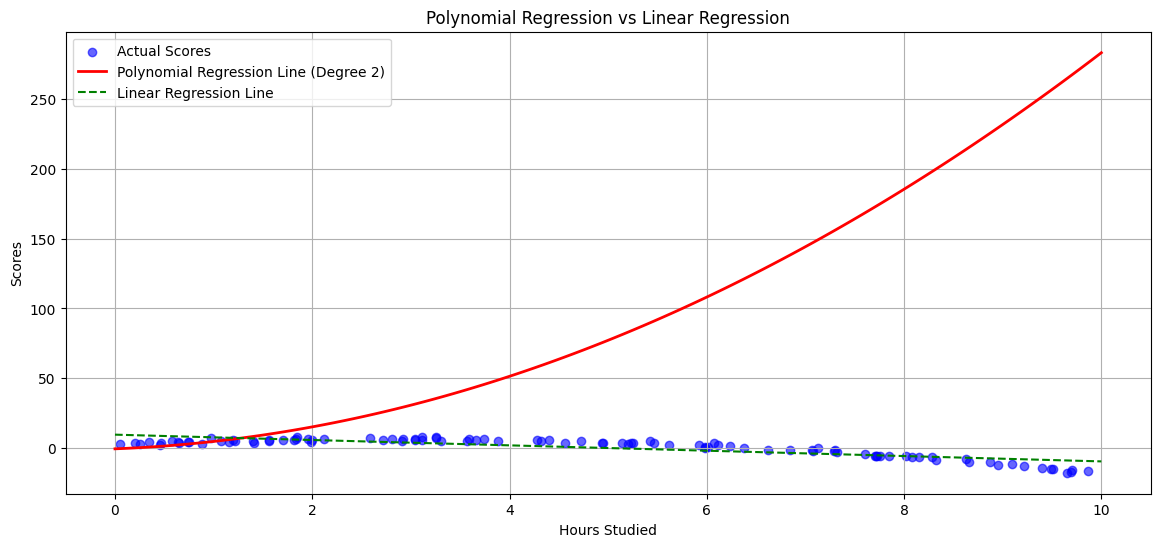

Polynomial Coefficients: a0 = -0.48, a1 = 2.73, a2 = 2.56
   Hours Studied     Scores  Predicted Scores (Polynomial)  \
0       3.745401   6.309236                      45.671292   
1       9.507143 -14.970463                     256.970953   
2       7.319939  -2.739178                     156.734230   
3       5.986585   0.052587                     107.651924   
4       1.560186   5.243797                      10.014001   

   Residuals (Polynomial)  
0              -39.362056  
1             -271.941416  
2             -159.473407  
3             -107.599337  
4               -4.770204  


In [1]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Create Synthetic Data
np.random.seed(42)  # For reproducibility
n_samples = 100
hours_studied = np.random.uniform(0, 10, n_samples)  # Hours studied
# Create a polynomial relationship with some noise
scores = 2 + 3 * hours_studied - 0.5 * (hours_studied ** 2) + np.random.normal(0, 1, n_samples)

# Create a DataFrame
data = pd.DataFrame({'Hours Studied': hours_studied, 'Scores': scores})

# Step 3: Add a new column for Hours Squared
data['Hours Squared'] = data['Hours Studied'] ** 2

# Step 4: Polynomial Regression using NumPy
# The coefficients a0, a1, a2 can be calculated using numpy's polyfit function
coefficients = np.polyfit(data['Hours Studied'], data['Scores'], 2)  # 2nd degree polynomial
a0, a1, a2 = coefficients

# Step 5: Calculate Predicted Scores using the polynomial regression equation
data['Predicted Scores (Polynomial)'] = a0 + a1 * data['Hours Studied'] + a2 * (data['Hours Studied'] ** 2)

# Step 6: Calculate Residuals
data['Residuals (Polynomial)'] = data['Scores'] - data['Predicted Scores (Polynomial)']

# Step 7: Visualization
plt.figure(figsize=(14, 6))

# Scatter plot of the actual data
plt.scatter(data['Hours Studied'], data['Scores'], color='blue', label='Actual Scores', alpha=0.6)

# Generate x values for the regression lines
x_values = np.linspace(0, 10, 100)
# Calculate polynomial predictions for the x values
y_values_poly = a0 + a1 * x_values + a2 * (x_values ** 2)

# Plot polynomial regression line
plt.plot(x_values, y_values_poly, color='red', label='Polynomial Regression Line (Degree 2)', linewidth=2)

# Linear Regression for comparison
linear_coefficients = np.polyfit(data['Hours Studied'], data['Scores'], 1)  # 1st degree polynomial
y_values_linear = linear_coefficients[0] * x_values + linear_coefficients[1]
plt.plot(x_values, y_values_linear, color='green', label='Linear Regression Line', linestyle='--')

# Final touches
plt.title('Polynomial Regression vs Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

# Display the coefficients and residuals
print("Polynomial Coefficients: a0 = {:.2f}, a1 = {:.2f}, a2 = {:.2f}".format(a0, a1, a2))
print(data[['Hours Studied', 'Scores', 'Predicted Scores (Polynomial)', 'Residuals (Polynomial)']].head())


Lab Title: Exploring Polynomial Regression and Model Evaluation